In [3]:
# Visualizations lib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

import pandas as pd
import numpy as np
pd.options.display.max_rows = 100

# models
from sklearn.impute import KNNImputer 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

import warnings
warnings.filterwarnings('ignore')
# from jupyterthemes import jtplot
# jtplot.style()

In [ ]:
headers = {
    'authority': 'api-sell24.cars24.team',
    'accept': 'application/json, text/plain, */*',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36',
    'pincode': '110001',
    'origin': 'https://www.cars24.com',
    'sec-fetch-site': 'cross-site',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.cars24.com/',
    'accept-language': 'en-US,en;q=0.9',
}

params = (
    ('sort', 'P'),
    ('serveWarrantyCount', 'false'),
    ('gaId', '332617789.1611807407'),
    ('page', '3'),
    ('storeCityId', '2'),
)

response = requests.get('https://api-sell24.cars24.team/buy-used-car', headers=headers, params=params)

totalPages = response.json()['data']['totalPages'] 
# print(totalPages)

link_list = []

for i in range(totalPages):
    url = 'https://www.cars24.com/buy-used-car/?sort=P&page=' + str(i+1) + '&storeCityId=2'
# url = 'https://www.cars24.com/buy-used-car/?sort=P&page=4&storeCityId=2'
# Step 1 : Get the HTML
    r = requests.get(url)
    htmlContent = r.content
# print(htmlContent)


# Step 2 : Parse the html
    soup = BeautifulSoup(htmlContent,"html.parser")

    for link in soup.find_all('a', href=True, class_ = '_20d39'):
        link_list.append(link['href'])


print(link_list)

# Get all the paragraphs from the page
paras = soup.find_all('p')
# print(paras)

# Get all the anchor tags from the page
anchors = soup.find_all('a')
# print(anchors)

#get all the links on the page
all_links = set()
for link in anchors:
    if (link != '#'):
        all_links.add(link.get('href'))
# print(all_links)

for link in soup.find_all('a', class_ = ""):
    
    if(link.get_text()=="Next"):
        url = 'https://www.cars24.com/buy-used-cars-new-delhi/' + link['href']
# Step 1 : Get the HTML
        r = requests.get(url)
        htmlContent = r.content
# print(htmlContent)

# Step 2 : Parse the html
        sp = BeautifulSoup(htmlContent,'html.parser')
    # if (link == '#'):
    #     print('hello')
        # for link in soup.find_all('a', href=True, class_ = '_20d39'):
        #     print(link['href'])

In [ ]:
def fill_data(ca,c1):
    if ca == "Kilometers":
        km_ = c1.find('p').getText()
        km.append(km_) 
    elif ca == "Year of Purchase":
        year_ = c1.find('p').getText()
        year.append(year_)
    elif ca == 'Owner':
        owner_type_ = c1.find('p').getText()
        owner_type.append(owner_type_)
    elif ca == 'Fuel':
        fuel_type_ = c1.find('p').getText()
        fuel_type.append(fuel_type_)
    elif ca == 'Transmission':
        transmission_type_ = c1.find('p').getText()
        transmission_type.append(transmission_type_)
    elif ca == 'RTO':
        RTO_ = c1.find('p').getText()
        RTO.append(RTO_)
    elif ca == 'Insurance Type':
        insurance_type_ = c1.find('p').getText()
        insurance_type.append(insurance_type_)
    elif ca == 'Insurance':
        insurance_date_ = c1.find('p').getText()
        insurance_date.append(insurance_date_)    
        

In [ ]:
def len_list(a):
    if len(km)!=a:
        km.append('NA')
    elif len(year)!=a:
        year.append('NA')
    elif len(owner_type)!=a:
        owner_type.append('NA')
    elif len(fuel_type)!=a:
        fuel_type.append('NA')
    elif len(insurance_type)!=a:
        insurance_type.append('NA')
    elif len(insurance_date)!=a:
        insurance_date.append('NA')
    elif len(transmission_type)!=a:
        transmission_type.append('NA')

In [ ]:
km = []
car_model = []
year = []
owner_type = []
fuel_type = []
transmission_type = []
RTO = []
insurance_type = []
insurance_date = []
price = []
n = 0
for i in range(len(link_list)):
    page = requests.get(link_list[i])
    soup = BeautifulSoup(page.text, 'html.parser')
    c1 = soup.find_all('div',{'class':'col-3'})
    if not c1:
        n = n + 1
        continue
    car_model_ = soup.find_all('div',{'class':'col-4'})[0]
    car_model_= car_model_.find('p').getText()#[5:17]
    car_model.append(car_model_)
    price_ = soup.find_all('div',{'class':'col-4'})[0]
    price_ = price_.find('h4').getText()
    price.append(price_)
    
    c0=soup.find_all('div',{'class':'col-3'})[0]
    l0=c0.find('label').getText()
    fill_data(l0,c0)
    
    c1=soup.find_all('div',{'class':'col-3'})[1]
    l1=c1.find('label').getText()
    fill_data(l1,c1)
    
    c2=soup.find_all('div',{'class':'col-3'})[2]
    l2=c2.find('label').getText()
    fill_data(l2,c2)
    
    c3=soup.find_all('div',{'class':'col-3'})[3]
    l3=c3.find('label').getText()
    fill_data(l3,c3)
    
    c4=soup.find_all('div',{'class':'col-3'})[4]
    l4=c4.find('label')
    if l4==None:
        continue
    else:
        l4=l4.getText()
    fill_data(l4,c4)
    
    c5=soup.find_all('div',{'class':'col-3'})[5]
    l5=c5.find('label')
    if l5==None:
        continue
    else:
        l5=l5.getText()
    fill_data(l5,c5)
    
    c6=soup.find_all('div',{'class':'col-3'})[6]
    l6=c6.find('label')
    if l6==None:
        continue
    else:
        l6=l6.getText()
    fill_data(l6,c6)
    
    c7=soup.find_all('div',{'class':'col-3'})[7]
    l7=c7.find('label')
    if l7==None:
        continue
    else:
        l7=l7.getText()
    fill_data(l7,c7)
    
    len_list(i+1)

In [ ]:
df = pd.DataFrame(list(zip(km, car_model,year,owner_type,insurance_date,insurance_type,RTO,fuel_type,transmission_type,price)), 
    columns =['Kilometers', 'cars_model','Year','Owner_Type','Insurance_Date','Insurance_Type','RTO','Fuel_Type','Transmission_Type','Price']) 

In [10]:
# save to csv
df.to_csv('car24_Delhi_records.csv')

In [11]:
# read the data
df = pd.read_csv('car24_Delhi_records.csv')
data = pd.DataFrame()

In [9]:
df.head()

,Kilometers,cars_model,Year,Owner_Type,Insurance_Date,Insurance_Type,RTO,Fuel_Type,Transmission_Type,Price
0,"50,007 km",2014 Tata Nano XT TWIST,December 2014,First Owner,22/2/2021,Comp,DL11,Petrol,MANUAL,"₹ 114,899"
1,"19,577 km",2016 Maruti Celerio ZXI OPT AMT,April 2016,First Owner,10/5/2021,Zero_Dep,DL6C,Petrol,AUTOMATIC,"₹ 368,499"
2,"57,650 km",2011 Maruti Wagon R 1.0 LXI CNG,May 2011,Second Owner,20/9/2021,Third_party,DL8C,Petrol + CNG,MANUAL,"₹ 196,199"
3,"47,447 km",2010 Hyundai Santro Xing GLS,March 2010,First Owner,27/3/2021,Comp,DL3C,Petrol + CNG,MANUAL,"₹ 156,460"
4,"13,337 km",2016 Maruti Alto K10 LXI,May 2016,First Owner,2/11/2021,Expired,DL6C,Petrol,MANUAL,"₹ 293,447"


In [4]:
# feature engineering

data1 = [] 
data2 = []
data3 = []
for i in range(0,len(df)):
    model  = df['cars_model'][i][5:-1]
    data1.append(model)
    brand = ' '.join(df['cars_model'][i][5:-1].split()[:1])
    data2.append(brand)
    car_model = ' '.join(df['cars_model'][i][5:-1].split()[1:2])
    data3.append(car_model)

data['Car_model'] = data1
data['Brand_name'] = data2
#data['Model_name'] = data3

In [8]:
df['Year'][1] = df.Year.str.split(" ",n=-1,expand=True)
data['Year'] = df['Year'][1][1]

In [9]:
df['Kilometers'][1] = df.Kilometers.str.split(" ",n=-1,expand=True)
data['Kilometers'] = df['Kilometers'][1][0]
data['Kilometers'] = data['Kilometers'].str.replace(',','')
data["Kilometers"] = pd.to_numeric(data["Kilometers"])

In [10]:
data['Fuel_Type'] = df['Fuel_Type']
data['Owner_Type'] = df['Owner_Type']
data['Insurance_Type'] = df['Insurance_Type']
data['RTO'] = df['RTO']
data['Transmission_Type'] = df['Transmission_Type']

In [11]:
df['Price'][1] = df.Price.str.split(" ", n=-1, expand=True)
data['Price'] = df['Price'][1][1]
data['Price'] = data['Price'].str.replace(',','')
data["Price"] = pd.to_numeric(data["Price"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_model          2378 non-null   object 
 1   Brand_name         2378 non-null   object 
 2   Year               2357 non-null   object 
 3   Kilometers         2357 non-null   float64
 4   Fuel_Type          2357 non-null   object 
 5   Owner_Type         2357 non-null   object 
 6   Insurance_Type     2359 non-null   object 
 7   RTO                2378 non-null   object 
 8   Transmission_Type  2225 non-null   object 
 9   Price              2378 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 185.9+ KB


In [13]:
# # data['No. of years'] = data.apply(lambda x:2021-int(x))
# data.drop(['Car_model','Year'],axis=1,inplace=True)

In [14]:
data.head(10)

,Car_model,Brand_name,Year,Kilometers,Fuel_Type,Owner_Type,Insurance_Type,RTO,Transmission_Type,Price
0,Tata Nano XT TWIS,Tata,2014,50007.0,Petrol,First Owner,Comp,DL11,MANUAL,114899
1,Maruti Celerio ZXI OPT AM,Maruti,2016,19577.0,Petrol,First Owner,Zero_Dep,DL6C,AUTOMATIC,368499
2,Maruti Wagon R 1.0 LXI CN,Maruti,2011,57650.0,Petrol + CNG,Second Owner,Third_party,DL8C,MANUAL,196199
3,Hyundai Santro Xing GL,Hyundai,2010,47447.0,Petrol + CNG,First Owner,Comp,DL3C,MANUAL,156460
4,Maruti Alto K10 LX,Maruti,2016,13337.0,Petrol,First Owner,Expired,DL6C,MANUAL,293447
5,Maruti Alto K10 LX,Maruti,2011,32089.0,Petrol,Second Owner,Third_party,DL3C,MANUAL,173699
6,Maruti Alto 800 LX,Maruti,2013,NaN,Petrol,First Owner,Comp,DL9C,MANUAL,203081
7,Maruti Ritz VDI,Maruti,NaN,28769.0,Diesel,First Owner,Comp,DL9C,MANUAL,300199
8,Maruti Celerio ZXI AM,Maruti,2012,16061.0,Petrol,NaN,Comp,DL9C,AUTOMATIC,399804
9,Hyundai i10 MAGNA 1.1 IRDE,Hyundai,2018,18002.0,NaN,Second Owner,Comp,DL2C,MANUAL,172600


In [15]:
# data['Model_name'].nunique()

In [16]:
data.isna().sum()

Car_model              0
Brand_name             0
Year                  21
Kilometers            21
Fuel_Type             21
Owner_Type            21
Insurance_Type        19
RTO                    0
Transmission_Type    153
Price                  0
dtype: int64

Text(0.5, 1.0, 'Percentage of missing values per feature')

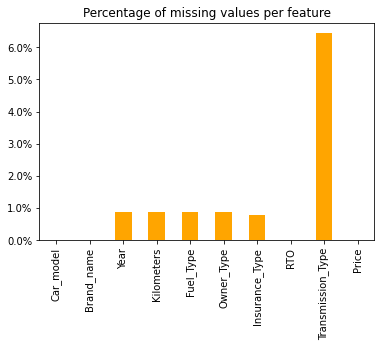

In [17]:
# Percentage of missing values per feature
data.isna().sum()
ax = (data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')

In [18]:
# unique values
data['Insurance_Type'].unique()

array(['Comp', 'Zero_Dep', 'Third_party', 'Expired', nan,
       'Insurance Expired', 'Comprehensive', 'Zero Depreciation',
       '3rd Party'], dtype=object)

In [19]:
data['Year'].unique()

array(['2014', '2016', '2011', '2010', '2013', nan, '2012', '2018',
       '2017', '2019', '2015', '2008', '2020', '2009', '2007', '2006',
       '2005', '2002'], dtype=object)

In [20]:
data['Fuel_Type'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', nan, 'Petrol + LPG',
       'Electric'], dtype=object)

In [21]:
data['Fuel_Type'].value_counts()

Petrol          1435
Diesel           620
Petrol + CNG     299
Petrol + LPG       2
Electric           1
Name: Fuel_Type, dtype: int64

In [22]:
data.loc[data['Fuel_Type']=='Electric','Fuel_Type'] = 'Petrol'

In [23]:
data['Fuel_Type'].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', nan, 'Petrol + LPG'],
      dtype=object)

In [25]:
data['Owner_Type'].unique()

array(['First Owner', 'Second Owner', nan, 'Third Owner', 'Fourth Owner',
       'Sixth Owner'], dtype=object)

In [26]:
data['Transmission_Type'].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [27]:
# fig = plt.figure(figsize=(25, 15))
# cols = 5
# rows = np.ceil(float(data.shape[1]) / cols)

# for i, column in enumerate(data.columns):
#     ax = fig.add_subplot(rows, cols, i + 1)
#     ax.set_title(column)
#     if data.dtypes[column] == np.object:
#         data[column].value_counts().plot(kind="bar", axes=ax)
#     else:
#         data[column].hist(axes=ax)
#         plt.xticks(rotation="vertical")
# plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_model          2378 non-null   object 
 1   Brand_name         2378 non-null   object 
 2   Year               2357 non-null   object 
 3   Kilometers         2357 non-null   float64
 4   Fuel_Type          2357 non-null   object 
 5   Owner_Type         2357 non-null   object 
 6   Insurance_Type     2359 non-null   object 
 7   RTO                2378 non-null   object 
 8   Transmission_Type  2225 non-null   object 
 9   Price              2378 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 185.9+ KB


In [29]:
data.columns

Index(['Car_model', 'Brand_name', 'Year', 'Kilometers', 'Fuel_Type',
       'Owner_Type', 'Insurance_Type', 'RTO', 'Transmission_Type', 'Price'],
      dtype='object')

In [30]:
# separate features on basis of their types
num_v = data.select_dtypes(['int64','float'])
cat_v = data.select_dtypes(['O'])

In [31]:
# fill missing values for numerical features
imputer = KNNImputer() 
num_v_1 = imputer.fit_transform(num_v) 

In [33]:
numerical_df = pd.DataFrame(num_v_1,columns=list(num_v.columns))

In [34]:
numerical_df

,Kilometers,Price
0,50007.0,114899.0
1,19577.0,368499.0
2,57650.0,196199.0
3,47447.0,156460.0
4,13337.0,293447.0
...,...,...
2373,4640.0,200000.0
2374,56245.0,415000.0
2375,43850.0,1850000.0
2376,83470.0,280000.0


In [35]:
numerical_df['Kilometers'] = np.log10(numerical_df['Kilometers'])

In [38]:
cat_v['Year'].mode()

0    2012
dtype: object

In [39]:
cat_v['Fuel_Type'].mode()

0    Petrol
dtype: object

In [40]:
cat_v['Owner_Type'].mode()

0    First Owner
dtype: object

In [41]:
cat_v['Insurance_Type'].mode()

0    Comp
dtype: object

In [42]:
cat_v['Transmission_Type'].mode()

0    MANUAL
dtype: object

In [43]:
# fill missing values of categorical values

cat_v["Year"].fillna('2012', inplace = True)  
cat_v["Fuel_Type"].fillna('Petrol', inplace = True)  
cat_v["Owner_Type"].fillna('Fifth Owner', inplace = True)  
cat_v["Insurance_Type"].fillna('Comp', inplace = True) 
cat_v["Transmission_Type"].fillna('MANUAL', inplace = True) 

In [44]:
cat_v.isna().sum()

Car_model            0
Brand_name           0
Year                 0
Fuel_Type            0
Owner_Type           0
Insurance_Type       0
RTO                  0
Transmission_Type    0
dtype: int64

In [45]:
cat_v['Year'] = cat_v['Year'].astype('int64')
cat_v['Years'] = cat_v['Year'].apply(lambda x:2021-x)
cat_v.drop(['Car_model','Year'],axis=1,inplace=True)

In [46]:
cat_v['RTO']=cat_v['RTO'].apply(lambda x:'Delhi'if x.startswith("DL") else 'Other_State')

In [47]:
cat_v = pd.get_dummies(cat_v, drop_first=True)


In [48]:
cat_v

,Years,Brand_name_BMW,Brand_name_Chevrolet,Brand_name_Datsun,Brand_name_Fiat,Brand_name_Ford,Brand_name_Honda,Brand_name_Hyundai,Brand_name_Jeep,Brand_name_KIA,...,Owner_Type_Third Owner,Insurance_Type_Comp,Insurance_Type_Comprehensive,Insurance_Type_Expired,Insurance_Type_Insurance Expired,Insurance_Type_Third_party,Insurance_Type_Zero Depreciation,Insurance_Type_Zero_Dep,RTO_Other_State,Transmission_Type_MANUAL
0,7,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,11,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,6,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2374,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2375,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2376,10,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [49]:
bn = data['Brand_name'].unique()

In [50]:
bn

array(['Tata', 'Maruti', 'Hyundai', 'Datsun', 'Honda', 'Toyota', 'Ford',
       'Renault', 'Volkswagen', 'Mahindra', 'BMW', 'Mercedes', 'Skoda',
       'Chevrolet', 'Nissan', 'Fiat', 'KIA', 'Ssangyong', 'MG', 'Audi',
       'Volvo', 'Jeep'], dtype=object)

In [51]:
cat_v.columns

Index(['Years', 'Brand_name_BMW', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
       'Brand_name_Fiat', 'Brand_name_Ford', 'Brand_name_Honda',
       'Brand_name_Hyundai', 'Brand_name_Jeep', 'Brand_name_KIA',
       'Brand_name_MG', 'Brand_name_Mahindra', 'Brand_name_Maruti',
       'Brand_name_Mercedes', 'Brand_name_Nissan', 'Brand_name_Renault',
       'Brand_name_Skoda', 'Brand_name_Ssangyong', 'Brand_name_Tata',
       'Brand_name_Toyota', 'Brand_name_Volkswagen', 'Brand_name_Volvo',
       'Fuel_Type_Petrol', 'Fuel_Type_Petrol + CNG', 'Fuel_Type_Petrol + LPG',
       'Owner_Type_First Owner', 'Owner_Type_Fourth Owner',
       'Owner_Type_Second Owner', 'Owner_Type_Sixth Owner',
       'Owner_Type_Third Owner', 'Insurance_Type_Comp',
       'Insurance_Type_Comprehensive', 'Insurance_Type_Expired',
       'Insurance_Type_Insurance Expired', 'Insurance_Type_Third_party',
       'Insurance_Type_Zero Depreciation', 'Insurance_Type_Zero_Dep',
       'RTO_Other_State', 'Transmission_Typ

In [52]:
cat_v[['Brand_name_BMW', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
       'Brand_name_Fiat', 'Brand_name_Ford', 'Brand_name_Honda',
       'Brand_name_Hyundai', 'Brand_name_Jeep', 'Brand_name_KIA',
       'Brand_name_MG', 'Brand_name_Mahindra', 'Brand_name_Maruti',
       'Brand_name_Mercedes', 'Brand_name_Nissan', 'Brand_name_Renault',
       'Brand_name_Skoda', 'Brand_name_Ssangyong', 'Brand_name_Tata',
       'Brand_name_Toyota', 'Brand_name_Volkswagen', 'Brand_name_Volvo']]

,Brand_name_BMW,Brand_name_Chevrolet,Brand_name_Datsun,Brand_name_Fiat,Brand_name_Ford,Brand_name_Honda,Brand_name_Hyundai,Brand_name_Jeep,Brand_name_KIA,Brand_name_MG,...,Brand_name_Maruti,Brand_name_Mercedes,Brand_name_Nissan,Brand_name_Renault,Brand_name_Skoda,Brand_name_Ssangyong,Brand_name_Tata,Brand_name_Toyota,Brand_name_Volkswagen,Brand_name_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
d = [cat_v,numerical_df]
final_df = pd.concat(d,join='outer',axis=1)

In [54]:
final_df.head(5)

,Years,Brand_name_BMW,Brand_name_Chevrolet,Brand_name_Datsun,Brand_name_Fiat,Brand_name_Ford,Brand_name_Honda,Brand_name_Hyundai,Brand_name_Jeep,Brand_name_KIA,...,Insurance_Type_Comprehensive,Insurance_Type_Expired,Insurance_Type_Insurance Expired,Insurance_Type_Third_party,Insurance_Type_Zero Depreciation,Insurance_Type_Zero_Dep,RTO_Other_State,Transmission_Type_MANUAL,Kilometers,Price
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.699031,114899.0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.291746,368499.0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4.760799,196199.0
3,11,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,4.676209,156460.0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,4.125058,293447.0


In [55]:
final_df.columns

Index(['Years', 'Brand_name_BMW', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
       'Brand_name_Fiat', 'Brand_name_Ford', 'Brand_name_Honda',
       'Brand_name_Hyundai', 'Brand_name_Jeep', 'Brand_name_KIA',
       'Brand_name_MG', 'Brand_name_Mahindra', 'Brand_name_Maruti',
       'Brand_name_Mercedes', 'Brand_name_Nissan', 'Brand_name_Renault',
       'Brand_name_Skoda', 'Brand_name_Ssangyong', 'Brand_name_Tata',
       'Brand_name_Toyota', 'Brand_name_Volkswagen', 'Brand_name_Volvo',
       'Fuel_Type_Petrol', 'Fuel_Type_Petrol + CNG', 'Fuel_Type_Petrol + LPG',
       'Owner_Type_First Owner', 'Owner_Type_Fourth Owner',
       'Owner_Type_Second Owner', 'Owner_Type_Sixth Owner',
       'Owner_Type_Third Owner', 'Insurance_Type_Comp',
       'Insurance_Type_Comprehensive', 'Insurance_Type_Expired',
       'Insurance_Type_Insurance Expired', 'Insurance_Type_Third_party',
       'Insurance_Type_Zero Depreciation', 'Insurance_Type_Zero_Dep',
       'RTO_Other_State', 'Transmission_Typ

In [56]:
final_df.columns = [c.replace('+', '') for c in final_df.columns]

In [57]:
final_df.columns = [c.replace('  ', ' ') for c in final_df.columns]

In [59]:
final_df.columns = [c.replace(' ', '_') for c in final_df.columns]

In [60]:
final_df.columns

Index(['Years', 'Brand_name_BMW', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
       'Brand_name_Fiat', 'Brand_name_Ford', 'Brand_name_Honda',
       'Brand_name_Hyundai', 'Brand_name_Jeep', 'Brand_name_KIA',
       'Brand_name_MG', 'Brand_name_Mahindra', 'Brand_name_Maruti',
       'Brand_name_Mercedes', 'Brand_name_Nissan', 'Brand_name_Renault',
       'Brand_name_Skoda', 'Brand_name_Ssangyong', 'Brand_name_Tata',
       'Brand_name_Toyota', 'Brand_name_Volkswagen', 'Brand_name_Volvo',
       'Fuel_Type_Petrol', 'Fuel_Type_Petrol_CNG', 'Fuel_Type_Petrol_LPG',
       'Owner_Type_First_Owner', 'Owner_Type_Fourth_Owner',
       'Owner_Type_Second_Owner', 'Owner_Type_Sixth_Owner',
       'Owner_Type_Third_Owner', 'Insurance_Type_Comp',
       'Insurance_Type_Comprehensive', 'Insurance_Type_Expired',
       'Insurance_Type_Insurance_Expired', 'Insurance_Type_Third_party',
       'Insurance_Type_Zero_Depreciation', 'Insurance_Type_Zero_Dep',
       'RTO_Other_State', 'Transmission_Type_MA

In [61]:
# import seaborn as sns
# plt.figure(figsize=(10,10))
# sns.heatmap(final_df.corr(),cmap='viridis',annot=True, square=True)

In [62]:
X = final_df.drop(['Price'],1)
y = final_df['Price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
ypred = rf_random.predict(X_test)
mse = mean_squared_error(ypred, y_test, squared=False)
rmse = np.sqrt(mse)
print('RMSE:',rmse)

RMSE: 433.6183237381137


In [72]:
# save the model to disk
filename = 'finalized_model (1).pkl'
pickle.dump(rf_random, open(filename, 'wb'))

In [73]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[317999.65599206 387839.3886416  318137.99356395 308523.19178837
 331827.82509599 307256.90321406 320179.08235907 357887.14442921
 343678.46205294 445360.25268882 353077.01271535 340022.18712761
 245836.91410789 307462.30123338 355256.61967837 313672.63020597
 160183.87292388 304271.06218574 357441.5885498  315820.16373099
 356785.27425807 394152.78896008 305529.65731235 325904.31398423
 799885.3663649  170388.79893794 310100.81284931 240926.95050325
 320583.88950152 369870.77099674 286018.85196886 309096.07890741
 328143.23302116 332510.01022513 333792.51411023 334600.45312136
 354405.05665614 279578.87922971 301212.30724465 418544.9561375
 321274.72392445 466659.08707498 363032.09512886 343417.57968819
 430105.56349676 284543.78432772 278475.22939277 328087.31864942
 363433.71116054 332055.82260413 261879.19783999 314812.25995639
 346698.91703661 330400.59235115 240641.55369522 372988.75926925
 306526.47153549 296987.04272358 478649.77766398 423116.11380944
 346315.55614476 331163.05